In [ ]:
# Description : This program give the sentiment of ADA from twitter users

In [10]:
# Import libraries
import tweepy
from textblob import TextBlob
import pandas as pd 
import numpy as np
import re # regular expression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# upload file
from google.colab import files
files.upload()

Saving logs.csv to logs.csv


{'logs.csv': b'Key\r\nCPlzmdasusAYmvMzewE8eXO7j\r\nFgzC3xzpfjTmJSFJTAQ53eifa4OcILISI1d1f84w3CO2PGmVSV\r\n1483563200448806913-GwKIUAC9kIsxF3QGUWq3Ui5CnsT0QN\r\nKGiOtYEZ684teWvQK92x3Fm5sQikmRpTdg95PNE4297bO'}

In [4]:
# Store the data
log = pd.read_csv('logs.csv')

In [5]:
# get the credentials
consumerKey = log["Key"][0]
consumerSecret = log["Key"][1]
accessToken = log["Key"][2]
accessTokenSecret = log["Key"][3]

In [11]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# set the access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
# create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [12]:
# Gather the 2000 tweets about Cardano and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'
# create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2018-11-01', tweet_mode='extended').items(2000)
        # tweepy.Cursor(api.search, q, tweet_mode='extended').items(tweetNumber)
# store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [14]:
# create a datframe to store the tweets with a columns call 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
# show the first 5 rows of Data
df.head(5)

,Tweets
0,El Salvador: 70.2% Have Little to No Confidenc...
1,@intocryptoverse I believe we should do all th...
2,Lex Friedman on #bitcoin https://t.co/BVMR32hAUt
3,People that say #Bitcoin #Crypto and #NFT's ar...
4,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...


In [15]:
# Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) # Removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) # Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # Removes any strings with a '#'
  twt = re.sub('\\n', '', twt) # removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) # Removes any hyperlinks
  return twt

In [16]:
# Clean the Tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
# show the dataset
df.head()

,Tweets,Cleaned_Tweets
0,El Salvador: 70.2% Have Little to No Confidenc...,El Salvador: 70.2% Have Little to No Confidenc...
1,@intocryptoverse I believe we should do all th...,@intocryptoverse I believe we should do all th...
2,Lex Friedman on #bitcoin https://t.co/BVMR32hAUt,Lex Friedman on bitcoin
3,People that say #Bitcoin #Crypto and #NFT's ar...,People that say Bitcoin and 's are bad then i...
4,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...


In [18]:
# Create a function to get the subjectifvity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called 'subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,El Salvador: 70.2% Have Little to No Confidenc...,El Salvador: 70.2% Have Little to No Confidenc...,0.500000,-0.187500
1,@intocryptoverse I believe we should do all th...,@intocryptoverse I believe we should do all th...,0.650000,0.900000
2,Lex Friedman on #bitcoin https://t.co/BVMR32hAUt,Lex Friedman on bitcoin,0.000000,0.000000
3,People that say #Bitcoin #Crypto and #NFT's ar...,People that say Bitcoin and 's are bad then i...,0.383333,-0.350000
4,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...,0.300000,0.266667


In [19]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

In [20]:
#Create a column to score the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,El Salvador: 70.2% Have Little to No Confidenc...,El Salvador: 70.2% Have Little to No Confidenc...,0.500000,-0.187500,Negative
1,@intocryptoverse I believe we should do all th...,@intocryptoverse I believe we should do all th...,0.650000,0.900000,Positive
2,Lex Friedman on #bitcoin https://t.co/BVMR32hAUt,Lex Friedman on bitcoin,0.000000,0.000000,Neutral
3,People that say #Bitcoin #Crypto and #NFT's ar...,People that say Bitcoin and 's are bad then i...,0.383333,-0.350000,Negative
4,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...,@BluesparrowC @souljaboy @NFTScratchOff @BlueS...,0.300000,0.266667,Positive


In [32]:
df['Tweets'][3]

'People that say #Bitcoin #Crypto and #NFT\'s are bad then immediately follow with \n\n"i ActUAllY kn0W WhAT iM tAlkINg ABouT"\n\nWe get it, you have no clue what you\'re talking about.'

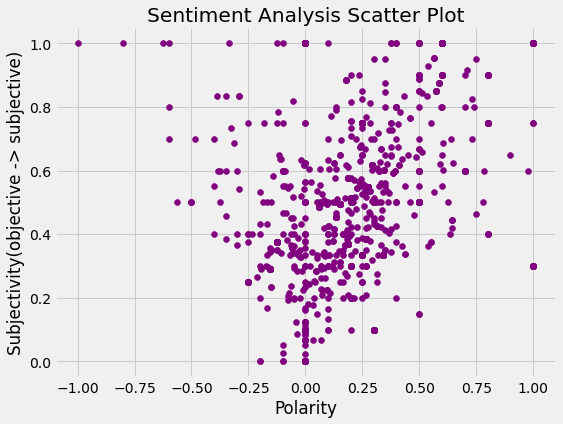

In [24]:
#Create a scatter plot to show the subjectivity and polarity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity(objective -> subjective)')
plt.show()

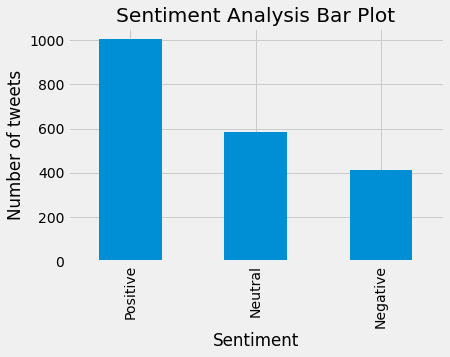

In [26]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

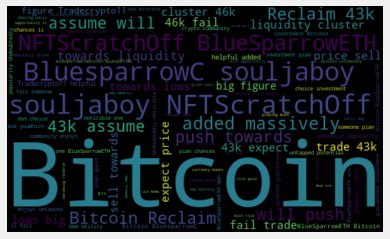

In [28]:
from wordcloud import WordCloud
#Plot the workcloud Cloud
allWords = ' '.join([twts for twts in df['Cleaned_Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
le mot le plus recherché dans les 30 secondes -> API coinmarketcap
IMPORTANCE DES APIS POUR LES DEVELLOPEURS
POUR ALLER PLUS LOIN